# B"H

---


## Heatmaps
- See: https://seaborn.pydata.org/generated/seaborn.heatmap.html
---

In [1]:
import os
import sys

# Import the regular expression module
import re

import numpy as np

import pandas as pd
from scipy.stats import zscore

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Prior size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Prior size: [6.0, 4.0]
Current size: [12, 9]


In [3]:
# -- -----------------------------------------------------------------
PROJ_ROOT = '../..'

print("------------------------------")
print("          PROJ_ROOT           ")
print(os.path.abspath(PROJ_ROOT))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(PROJ_ROOT, 'src')
sys.path.append(src_dir)


print("------------------------------")
print("           src_dir            ")
print(os.path.abspath(src_dir))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# import my method from the source code
%aimport helper_functions
import helper_functions as hf
# -- -----------------------------------------------------------------

------------------------------
          PROJ_ROOT           
/home/laz/repos/laz-main/edu/springboard/codebase
------------------------------
 
------------------------------
           src_dir            
/home/laz/repos/laz-main/edu/springboard/codebase/src
------------------------------
 


---
### Import Data

In [4]:
auto = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'auto-mpg.csv'    
)


auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s


In [5]:
hp  = auto['hp'].values
mpg = auto['mpg'].values

---

### Create the ***covariance matrix***
- SEE: https://pythonprogramming.net/pandas-statistics-correlation-tables-how-to/

In [9]:
cov_matrix = auto.loc[
    :, 
    ['mpg', 'hp', 'weight', 'accel', 'size']
].corr()

In [10]:
cov_matrix

,mpg,hp,weight,accel,size
mpg,1.000000,-0.778427,-0.832244,0.423329,-0.806682
hp,-0.778427,1.000000,0.864538,-0.689196,0.869720
weight,-0.832244,0.864538,1.000000,-0.416839,0.992019
accel,0.423329,-0.689196,-0.416839,1.000000,-0.426547
size,-0.806682,0.869720,0.992019,-0.426547,1.000000


---

### Visualizing correlations with a heatmap

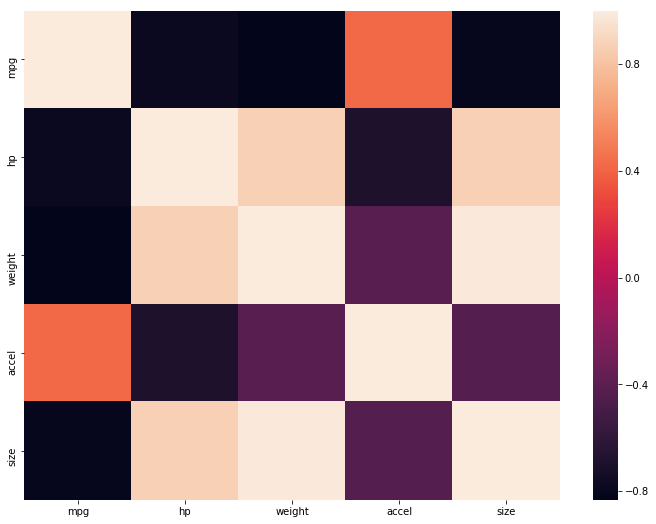

In [12]:
# Visualize the covariance matrix using a heatmap
sns.heatmap(cov_matrix)

plt.show()

---

### Change the limits of the colormap

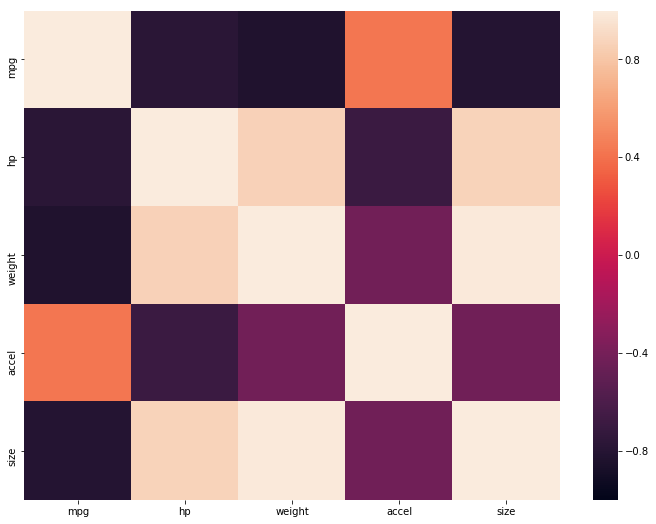

In [13]:
# Visualize the covariance matrix using a heatmap
sns.heatmap(
    data = cov_matrix,
    vmin = -1, 
    vmax = 1
)

plt.show()